In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
import datetime as dt


In [711]:
dados1 = pd.read_csv("data_1__.csv")
dados1 = pd.DataFrame(dados1)

In [712]:
dados1 = dados1.drop(columns=['index'])

print(dados1)

           data      valor
0    2016-08-29       9.00
1    2016-08-30       1.60
2    2016-08-31   15311.70
3    2016-09-01   13932.67
4    2016-09-02   11535.45
5    2016-09-03   25864.32
6    2016-09-04  161344.35
7    2016-09-07   46380.31
8    2016-09-08    7341.94
9    2016-09-09   20184.57
10   2016-09-10   28359.77
11   2016-09-11   91701.65
12   2016-09-14   14836.67
13   2016-09-15   12446.20
14   2016-09-16   12083.45
15   2016-09-17   31864.65
16   2016-09-18   94610.57
17   2016-09-21   16865.56
18   2016-09-22    9134.95
19   2016-09-23   17733.30
20   2016-09-25  115505.50
21   2016-09-26     580.40
22   2016-09-28   18110.85
23   2016-09-29    7492.46
24   2016-09-30    5652.10
25   2016-10-01   84379.41
26   2016-10-02   87796.85
27   2016-10-05   16684.48
28   2016-10-06    6360.95
29   2016-10-07   13873.31
..          ...        ...
559  2018-09-20   11448.55
560  2018-09-21   32258.55
561  2018-09-22   17948.50
562  2018-09-23   99973.90
563  2018-09-26   13598.15
5

In [713]:
dados2 = pd.read_csv("data_2__.csv")
dados3 = pd.read_csv("data_3__.csv")
dados4 = pd.read_csv("data_4__.csv")
dados2 = dados2.drop(columns=['index'])
dados3 = dados3.drop(columns=['index'])
dados4 = dados4.drop(columns=['Srore_id', 'Product id'])
#dados3 =
#dados4 = 
print(dados2)
print(dados3)
print(dados4)

            data     valor
0     2014-07-18      1.50
1     2014-08-05     83.20
2     2014-08-08     22.50
3     2014-08-11     15.91
4     2014-08-12      0.44
5     2014-08-13   1393.49
6     2014-08-14   2100.92
7     2014-08-15   2882.71
8     2014-08-16   3893.80
9     2014-08-17   3774.72
10    2014-08-18   1687.77
11    2014-08-19   1091.96
12    2014-08-20   1659.50
13    2014-08-21   1737.11
14    2014-08-22   3388.52
15    2014-08-23   4107.50
16    2014-08-24   4626.87
17    2014-08-25   1760.93
18    2014-08-26   1640.58
19    2014-08-27   2107.75
20    2014-08-28   2690.52
21    2014-08-29   3385.84
22    2014-08-30   5117.44
23    2014-08-31   5058.88
24    2014-09-01   2284.99
25    2014-09-02   1918.14
26    2014-09-03   2508.91
27    2014-09-04   2015.57
28    2014-09-05   4133.71
29    2014-09-06   4774.22
...          ...       ...
1512  2018-10-02  11745.41
1513  2018-10-03  12396.01
1514  2018-10-04  12038.50
1515  2018-10-05  16057.87
1516  2018-10-06  22377.21
1

In [714]:
dados1.values[:,0]

array(['2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01',
       '2016-09-02', '2016-09-03', '2016-09-04', '2016-09-07',
       '2016-09-08', '2016-09-09', '2016-09-10', '2016-09-11',
       '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-17',
       '2016-09-18', '2016-09-21', '2016-09-22', '2016-09-23',
       '2016-09-25', '2016-09-26', '2016-09-28', '2016-09-29',
       '2016-09-30', '2016-10-01', '2016-10-02', '2016-10-05',
       '2016-10-06', '2016-10-07', '2016-10-09', '2016-10-12',
       '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16',
       '2016-10-19', '2016-10-20', '2016-10-22', '2016-10-23',
       '2016-10-24', '2016-10-26', '2016-10-27', '2016-10-28',
       '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01',
       '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-05',
       '2016-11-06', '2016-11-09', '2016-11-10', '2016-11-11',
       '2016-11-12', '2016-11-13', '2016-11-14', '2016-11-15',
       '2016-11-16', '2016-11-17', '2016-11-18', '2016-

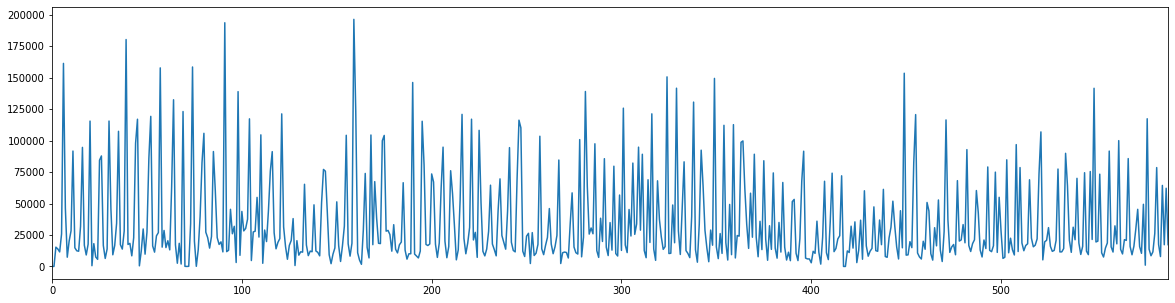

In [715]:
dados1.valor.plot(figsize=(20,5))

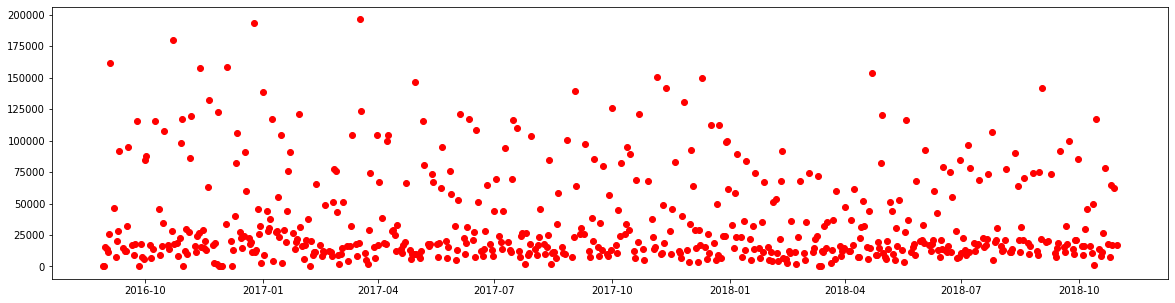

In [716]:
plt.figure(figsize=(20,5))
dates = dados1.values[:,0]
dates = [pd.to_datetime(d) for d in dates]
plt.plot_date(dates, dados1.values[:,1], c = 'red')

In [717]:
dados1.data = pd.to_datetime(dados1.data)

dadosMes1 = (dados1.groupby('data').valor.sum()).groupby([(dados1.groupby('data').valor.sum()).index.month, (dados1.groupby('data').valor.sum()).index.year]).cumsum().reset_index()

print(dadosMes1)

          data      valor
0   2016-08-29       9.00
1   2016-08-30      10.60
2   2016-08-31   15322.30
3   2016-09-01   13932.67
4   2016-09-02   25468.12
5   2016-09-03   51332.44
6   2016-09-04  212676.79
7   2016-09-07  259057.10
8   2016-09-08  266399.04
9   2016-09-09  286583.61
10  2016-09-10  314943.38
11  2016-09-11  406645.03
12  2016-09-14  421481.70
13  2016-09-15  433927.90
14  2016-09-16  446011.35
15  2016-09-17  477876.00
16  2016-09-18  572486.57
17  2016-09-21  589352.13
18  2016-09-22  598487.08
19  2016-09-23  616220.38
20  2016-09-25  731725.88
21  2016-09-26  732306.28
22  2016-09-28  750417.13
23  2016-09-29  757909.59
24  2016-09-30  763561.69
25  2016-10-01   84379.41
26  2016-10-02  172176.26
27  2016-10-05  188860.74
28  2016-10-06  195221.69
29  2016-10-07  209095.00
..         ...        ...
559 2018-09-20  446226.21
560 2018-09-21  478484.76
561 2018-09-22  496433.26
562 2018-09-23  596407.16
563 2018-09-26  610005.31
564 2018-09-27  619942.51
565 2018-09-

In [718]:
dados2.data = pd.to_datetime(dados2.data)

dadosMes2 = (dados2.groupby('data').valor.sum()).groupby([(dados2.groupby('data').valor.sum()).index.month, (dados2.groupby('data').valor.sum()).index.year]).cumsum().reset_index()

print(dadosMes2)

           data      valor
0    2014-07-18       1.50
1    2014-08-05      83.20
2    2014-08-08     105.70
3    2014-08-11     121.61
4    2014-08-12     122.05
5    2014-08-13    1515.54
6    2014-08-14    3616.46
7    2014-08-15    6499.17
8    2014-08-16   10392.97
9    2014-08-17   14167.69
10   2014-08-18   15855.46
11   2014-08-19   16947.42
12   2014-08-20   18606.92
13   2014-08-21   20344.03
14   2014-08-22   23732.55
15   2014-08-23   27840.05
16   2014-08-24   32466.92
17   2014-08-25   34227.85
18   2014-08-26   35868.43
19   2014-08-27   37976.18
20   2014-08-28   40666.70
21   2014-08-29   44052.54
22   2014-08-30   49169.98
23   2014-08-31   54228.86
24   2014-09-01    2284.99
25   2014-09-02    4203.13
26   2014-09-03    6712.04
27   2014-09-04    8727.61
28   2014-09-05   12861.32
29   2014-09-06   17635.54
...         ...        ...
1512 2018-10-02   23319.71
1513 2018-10-03   35715.72
1514 2018-10-04   47754.22
1515 2018-10-05   63812.09
1516 2018-10-06   86189.30
1

In [719]:
dados3.data = pd.to_datetime(dados3.data)

dadosMes3 = (dados3.groupby('data').valor.sum()).groupby([(dados3.groupby('data').valor.sum()).index.month, (dados3.groupby('data').valor.sum()).index.year]).cumsum().reset_index()

print(dadosMes3)

         data      valor
0  2018-08-21    3914.55
1  2018-08-22    7627.57
2  2018-08-23   15629.32
3  2018-08-24   26942.27
4  2018-08-25   42172.28
5  2018-08-26   53381.09
6  2018-08-27   56523.49
7  2018-08-28   59550.69
8  2018-08-29   64477.21
9  2018-08-30   72542.47
10 2018-08-31   83050.67
11 2018-09-01   17168.31
12 2018-09-02   30548.81
13 2018-09-03   33382.08
14 2018-09-04   37926.66
15 2018-09-05   44543.21
16 2018-09-06   62017.95
17 2018-09-07   80623.40
18 2018-09-08   94636.85
19 2018-09-09  106035.68
20 2018-09-10  109029.82
21 2018-09-11  111351.34
22 2018-09-12  115589.32
23 2018-09-13  124569.92
24 2018-09-14  136150.33
25 2018-09-15  153998.18
26 2018-09-16  168625.97
27 2018-09-17  171809.36
28 2018-09-18  175350.78
29 2018-09-19  180800.12
..        ...        ...
42 2018-10-02    9236.42
43 2018-10-03   14561.55
44 2018-10-04   25355.37
45 2018-10-05   41795.10
46 2018-10-06   57940.15
47 2018-10-07   72894.64
48 2018-10-08   76555.30
49 2018-10-09   80000.67


In [720]:
dados4.YearMonth = pd.to_datetime(dados4.YearMonth ,format='%Y%m')

dadosMes4 = (dados4.groupby('YearMonth').Volume.sum()).groupby([(dados4.groupby('YearMonth').Volume.sum()).index.month, (dados4.groupby('YearMonth').Volume.sum()).index.year]).cumsum().reset_index()

print(dadosMes4)

    YearMonth      Volume
0  2013-01-01   7668.0000
1  2013-02-01     10.3092
2  2013-03-01     16.5288
3  2013-04-01     13.3764
4  2013-05-01     20.2776
5  2013-06-01     22.8336
6  2013-07-01     15.2508
7  2013-08-01     19.2552
8  2013-09-01  18744.0000
9  2013-10-01     19.1700
10 2013-11-01     13.0356
11 2013-12-01     14.7396
12 2014-01-01     14.1432
13 2014-02-01     16.9548
14 2014-03-01     19.7664
15 2014-04-01     13.5468
16 2014-05-01  18318.0000
17 2014-06-01     16.6992
18 2014-07-01     18.9996
19 2014-08-01     17.2956
20 2014-09-01     13.7172
21 2014-10-01     12.0000
22 2014-11-01  20022.0000
23 2014-12-01  13242.0000
24 2015-01-01  11112.0000
25 2015-02-01     12.4484
26 2015-03-01     16.5604
27 2015-04-01     11.6724
28 2015-05-01     20.9592
29 2015-06-01     23.5152
30 2015-07-01     11.5872
31 2015-08-01      8.0852
32 2015-09-01     13.5784
33 2015-10-01     12.4392
34 2015-11-01      9.5424
35 2015-12-01     12.2688
36 2016-01-01  15336.0000
37 2016-02-0

In [721]:
dadosMes1.data = pd.to_datetime(dadosMes1.data)

dadosMes1.set_index('data', inplace=True)

dadosMes2.data = pd.to_datetime(dadosMes2.data)

dadosMes2.set_index('data', inplace=True)

dadosMes3.data = pd.to_datetime(dadosMes3.data)

dadosMes3.set_index('data', inplace=True)

dadosMes4.YearMonth = pd.to_datetime(dadosMes4.YearMonth)

dadosMes4.set_index('YearMonth', inplace=True)


In [722]:
dadosMes2 = dadosMes2.resample('M', how='max')
dadosMes3 = dadosMes3.resample('M', how='max')
dadosMes4 = dadosMes4.resample('M', how='max')

/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  """Entry point for launching an IPython kernel.
/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  
/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  This is separate from the ipykernel package so we can avoid doing imports until


In [723]:
dadosMes1 = dadosMes1.resample('M', how='max')

/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  """Entry point for launching an IPython kernel.


In [724]:
dadosMes1

,valor
data,
2016-08-31,15322.30
2016-09-30,763561.69
2016-10-31,1060060.55
2016-11-30,972638.69
2016-12-31,1090154.76
2017-01-31,1145117.60
2017-02-28,593055.09
2017-03-31,872141.22
2017-04-30,803613.69


In [725]:
#X_inicial.reset_index(inplace=True)
X_inicial = dadosMes1[:26]
print(X_inicial)

                 valor
data                  
2016-08-31    15322.30
2016-09-30   763561.69
2016-10-31  1060060.55
2016-11-30   972638.69
2016-12-31  1090154.76
2017-01-31  1145117.60
2017-02-28   593055.09
2017-03-31   872141.22
2017-04-30   803613.69
2017-05-31   835288.00
2017-06-30   772101.88
2017-07-31   889074.90
2017-08-31   541552.24
2017-09-30   808593.92
2017-10-31   893019.58
2017-11-30   854380.61
2017-12-31  1113845.04
2018-01-31   678717.40
2018-02-28   517116.27
2018-03-31   534316.70
2018-04-30   830555.18
2018-05-31   628620.80
2018-06-30   759047.88
2018-07-31   711501.72
2018-08-31   700150.67
2018-09-30   747653.22


In [726]:
X_inicial2 = dadosMes2[:dadosMes2.size-1]
print(X_inicial2)
X_inicial3 = dadosMes3[:dadosMes3.size-1]
print(X_inicial3)
X_inicial4 = dadosMes4[:dadosMes4.size-1]
print(X_inicial4)

                valor
data                 
2014-07-31       1.50
2014-08-31   54228.86
2014-09-30   79707.74
2014-10-31   92994.49
2014-11-30   99751.70
2014-12-31  121334.26
2015-01-31   80715.76
2015-02-28   72224.63
2015-03-31   73179.45
2015-04-30  263512.38
2015-05-31  325193.14
2015-06-30  333163.07
2015-07-31  402575.47
2015-08-31  331405.31
2015-09-30  294473.47
2015-10-31  331473.15
2015-11-30  337373.41
2015-12-31  438262.95
2016-01-31  398732.38
2016-02-29  300369.98
2016-03-31  307800.64
2016-04-30  323850.44
2016-05-31  338480.67
2016-06-30  332429.23
2016-07-31  408854.16
2016-08-31  303855.82
2016-09-30  343189.30
2016-10-31  398158.72
2016-11-30  390197.68
2016-12-31  486007.35
2017-01-31  469226.43
2017-02-28  360349.55
2017-03-31  417884.31
2017-04-30  428958.07
2017-05-31  355875.02
2017-06-30  340212.38
2017-07-31  407182.17
2017-08-31  331542.19
2017-09-30  330447.87
2017-10-31  344800.27
2017-11-30  366203.59
2017-12-31  503843.42
2018-01-31  449808.06
2018-02-28

In [727]:

alvo = dadosMes1[26:27]
alvo2 = dadosMes2[dadosMes2.size-1:dadosMes2.size]
alvo3 = dadosMes3[dadosMes3.size-1:dadosMes3.size]
alvo4 = dadosMes4[dadosMes4.size-1:dadosMes4.size]

In [728]:
print(y)
X_inicial.reset_index(level=0, inplace=True)
X = X_inicial.data
y = X_inicial['valor']
X_inicial2.reset_index(level=0, inplace=True)
X2 = X_inicial2.data
y2 = X_inicial2['valor']
X_inicial3.reset_index(level=0, inplace=True)
X3 = X_inicial3.data
y3 = X_inicial3['valor']
X_inicial4.reset_index(level=0, inplace=True)
X4 = X_inicial4.YearMonth
y4 = X_inicial4['Volume']

[[  15322.3 ]
 [ 763561.69]
 [1060060.55]
 [ 972638.69]
 [1090154.76]
 [1145117.6 ]
 [ 593055.09]
 [ 872141.22]
 [ 803613.69]
 [ 835288.  ]
 [ 772101.88]
 [ 889074.9 ]
 [ 541552.24]
 [ 808593.92]
 [ 893019.58]
 [ 854380.61]
 [1113845.04]
 [ 678717.4 ]
 [ 517116.27]
 [ 534316.7 ]
 [ 830555.18]
 [ 628620.8 ]
 [ 759047.88]
 [ 711501.72]
 [ 700150.67]
 [ 747653.22]]


In [729]:
print(y)

0       15322.30
1      763561.69
2     1060060.55
3      972638.69
4     1090154.76
5     1145117.60
6      593055.09
7      872141.22
8      803613.69
9      835288.00
10     772101.88
11     889074.90
12     541552.24
13     808593.92
14     893019.58
15     854380.61
16    1113845.04
17     678717.40
18     517116.27
19     534316.70
20     830555.18
21     628620.80
22     759047.88
23     711501.72
24     700150.67
25     747653.22
Name: valor, dtype: float64


In [730]:
print(X)

0    2016-08-31
1    2016-09-30
2    2016-10-31
3    2016-11-30
4    2016-12-31
5    2017-01-31
6    2017-02-28
7    2017-03-31
8    2017-04-30
9    2017-05-31
10   2017-06-30
11   2017-07-31
12   2017-08-31
13   2017-09-30
14   2017-10-31
15   2017-11-30
16   2017-12-31
17   2018-01-31
18   2018-02-28
19   2018-03-31
20   2018-04-30
21   2018-05-31
22   2018-06-30
23   2018-07-31
24   2018-08-31
25   2018-09-30
Name: data, dtype: datetime64[ns]


In [731]:
print(X)


0    2016-08-31
1    2016-09-30
2    2016-10-31
3    2016-11-30
4    2016-12-31
5    2017-01-31
6    2017-02-28
7    2017-03-31
8    2017-04-30
9    2017-05-31
10   2017-06-30
11   2017-07-31
12   2017-08-31
13   2017-09-30
14   2017-10-31
15   2017-11-30
16   2017-12-31
17   2018-01-31
18   2018-02-28
19   2018-03-31
20   2018-04-30
21   2018-05-31
22   2018-06-30
23   2018-07-31
24   2018-08-31
25   2018-09-30
Name: data, dtype: datetime64[ns]


In [732]:
print(y)

0       15322.30
1      763561.69
2     1060060.55
3      972638.69
4     1090154.76
5     1145117.60
6      593055.09
7      872141.22
8      803613.69
9      835288.00
10     772101.88
11     889074.90
12     541552.24
13     808593.92
14     893019.58
15     854380.61
16    1113845.04
17     678717.40
18     517116.27
19     534316.70
20     830555.18
21     628620.80
22     759047.88
23     711501.72
24     700150.67
25     747653.22
Name: valor, dtype: float64


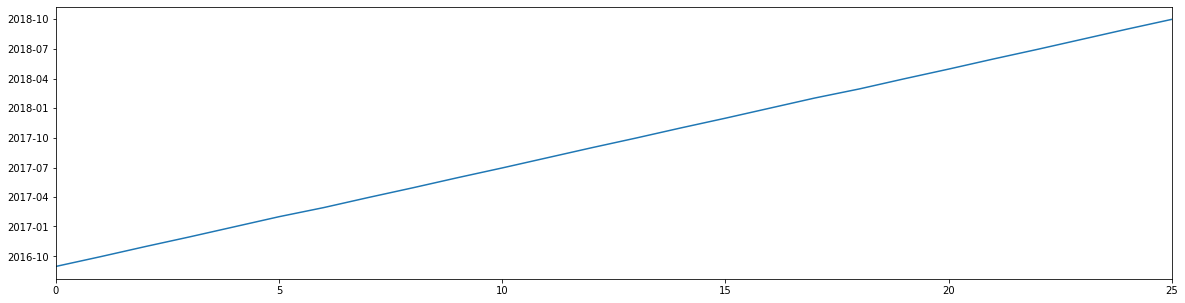

In [733]:
X.plot(figsize=(20,5))


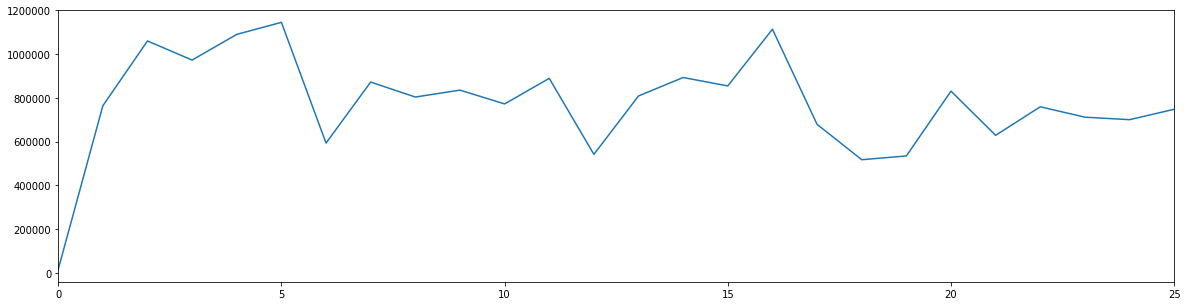

In [734]:
y.plot(figsize=(20,5))

In [735]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)
X2 = X2.values.reshape(-1,1)
y2 = y2.values.reshape(-1,1)
X3 = X3.values.reshape(-1,1)
y3 = y3.values.reshape(-1,1)
X4 = X4.values.reshape(-1,1)
y4 = y4.values.reshape(-1,1)
alvo = alvo.values.reshape(-1,1)
alvo2 = alvo2.values.reshape(-1,1)
alvo3 = alvo3.values.reshape(-1,1)
alvo4 = alvo4.values.reshape(-1,1)

In [736]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.40, random_state=42)

X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(X2, y2, test_size=0.40, random_state=42)
X_treino3, X_teste3, y_treino3, y_teste3 = train_test_split(X3, y3, test_size=0.40, random_state=42)
X_treino4, X_teste4, y_treino4, y_teste4 = train_test_split(X4, y4, test_size=0.40, random_state=42)



In [737]:
X

array([['2016-08-31T00:00:00.000000000'],
       ['2016-09-30T00:00:00.000000000'],
       ['2016-10-31T00:00:00.000000000'],
       ['2016-11-30T00:00:00.000000000'],
       ['2016-12-31T00:00:00.000000000'],
       ['2017-01-31T00:00:00.000000000'],
       ['2017-02-28T00:00:00.000000000'],
       ['2017-03-31T00:00:00.000000000'],
       ['2017-04-30T00:00:00.000000000'],
       ['2017-05-31T00:00:00.000000000'],
       ['2017-06-30T00:00:00.000000000'],
       ['2017-07-31T00:00:00.000000000'],
       ['2017-08-31T00:00:00.000000000'],
       ['2017-09-30T00:00:00.000000000'],
       ['2017-10-31T00:00:00.000000000'],
       ['2017-11-30T00:00:00.000000000'],
       ['2017-12-31T00:00:00.000000000'],
       ['2018-01-31T00:00:00.000000000'],
       ['2018-02-28T00:00:00.000000000'],
       ['2018-03-31T00:00:00.000000000'],
       ['2018-04-30T00:00:00.000000000'],
       ['2018-05-31T00:00:00.000000000'],
       ['2018-06-30T00:00:00.000000000'],
       ['2018-07-31T00:00:00.00000

In [738]:
clf = ensemble.GradientBoostingRegressor()
clf.fit(X_treino, y_treino)


/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [739]:
mse = metrics.mean_squared_error(y_teste, clf.predict(X_teste))
print("MSE: %.4f" % mse)
clf.fit(X_treino2, y_treino2)
mse = metrics.mean_squared_error(y_teste2, clf.predict(X_teste2))
print("MSE: %.4f" % mse)
clf.fit(X_treino3, y_treino3)
mse = metrics.mean_squared_error(y_teste3, clf.predict(X_teste3))
print("MSE: %.4f" % mse)
clf.fit(X_treino4, y_treino4)
mse = metrics.mean_squared_error(y_teste4, clf.predict(X_teste4))
print("MSE: %.4f" % mse)


MSE: 130613869343.0044
MSE: 5250355073.9947
MSE: 45648719684.4721
MSE: 78523767.6016


/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [742]:
rfg = RandomForestRegressor(n_estimators=10, random_state=42)

rfg.fit(X_treino, y_treino)
mse = metrics.mean_squared_error(y_teste, rfg.predict(X_teste))
print("MSE: %.4f" % mse)

clf.fit(X_treino2, y_treino2)
mse = metrics.mean_squared_error(y_teste2, rfg.predict(X_teste2))
print("MSE: %.4f" % mse)
clf.fit(X_treino3, y_treino3)
mse = metrics.mean_squared_error(y_teste3, rfg.predict(X_teste3))
print("MSE: %.4f" % mse)
clf.fit(X_treino4, y_treino4)
mse = metrics.mean_squared_error(y_teste4, rfg.predict(X_teste4))
print("MSE: %.4f" % mse)

rfg.fit(X_treino, y_treino)
mse = metrics.mean_squared_error(alvo, rfg.predict(alvo.data))
print("MSE: %.4f" % mse)

clf.fit(X_treino2, y_treino2)
mse = metrics.mean_squared_error(alvo2, rfg.predict(alvo2.data))
print("MSE: %.4f" % mse)
clf.fit(X_treino3, y_treino3)
mse = metrics.mean_squared_error(alvo3, rfg.predict(alvo3.data))
print("MSE: %.4f" % mse)
clf.fit(X_treino4, y_treino4)
mse = metrics.mean_squared_error(alvo4, rfg.predict(alvo4.data))
print("MSE: %.4f" % mse)


MSE: 109522671413.0296
MSE: 311887363211.2993
MSE: 186530889696.5283
MSE: 836049567346.0973
MSE: 104105251378.1299
MSE: 251159294857.4658
MSE: 466668515131.0110
MSE: 918073416390.0856


/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A col